In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LazyGrids,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

isommerfield (generic function with 4 methods)

In [16]:
d = 40.0
z = 20.0

mat1 = material(1.0,1.0)

ind = 3

mat2 = [material(-1.0+0.01*im,-1.0),material(-1.0+0.1*im,1.0),mat1];

In [17]:
λ = 400.
k₀ = 2π/λ

layer = layerstructure([mat1,mat2[ind],mat1],d*[-0.5,0.5],"down")

green = greenreflect(layer);

In [18]:
n = 80

x = 0.25*λ*collect(LinRange(-1,1,n))
y = x

xx,yy = ndgrid(x,y)

pos1 = [xx[:] yy[:] 0*xx[:].-0.5*d.-z]

g1 = GreenEval(green,pos1,repeat([0 40 0.5*d+z],n^2),k₀)
g2 = GreenEval(green,pos1,repeat([0 -40 0.5*d+z],n^2),k₀)

g = reshape(g1+g2,(:,3,3));

┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/integrator_interface.jl:606
┌ Warning: Instability detected. Aborting
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/integrator_interface.jl:606


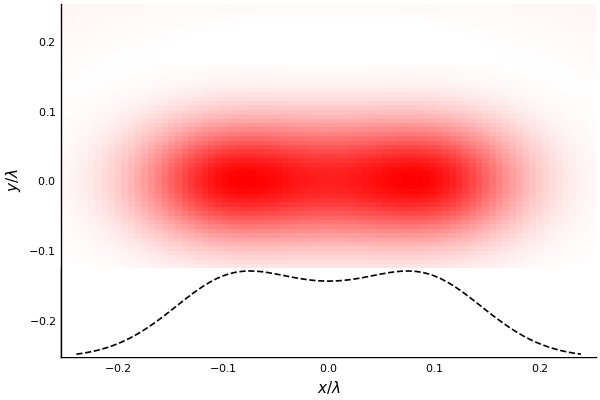

In [19]:
imagen = reshape(abs.(g[:,3,3]).^2,(n,n)) 

BB = bbox(0.0,0.75,1.,0.25)
heatmap(x/λ,y/λ,imagen,c=cgrad([:white, :red]),colorbar=false,xlabel=L"x/\lambda",ylabel=L"y/\lambda")
plot!(x/λ,imagen[40,:],c=:black,ls=:dash,bg=:white,lw=1.2,grid=false,xaxis=false,yticks=false,label="",inset=(1,BB),subplot=2)